In [30]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal import oaconvolve
from scipy.signal import remez
from scipy.signal import savgol_coeffs
import numpy as np

In [93]:
k=25
lpf = remez(k, [0., 0.12, 0.18, 1.],[1., 0.],fs =2.)
lpf2 = remez(k, [0., 0.1, 0.2, 1.],[1., 0.],fs =2.)

lpf3= remez(k, [0., 0.1, 0.15, 1.],[1., 0.],fs =2.)

#lpf =lpf[1:-1]
sg2 = savgol_coeffs(k,2)
sg3 = savgol_coeffs(k-4,4)
sg3 = np.concatenate([np.zeros(2),sg3,np.zeros(2)])
sg4 = savgol_coeffs(k,6)
kai = np.kaiser(k,18)
kai = kai/sum(abs(kai))

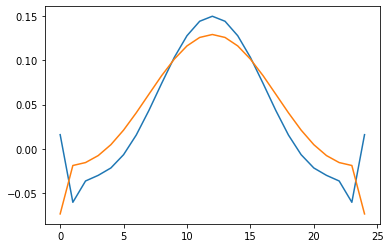

In [94]:
plt.plot(lpf)
plt.plot(lpf3)

#plt.plot(sg2)

#plt.plot(sg3)
#plt.plot(kai)

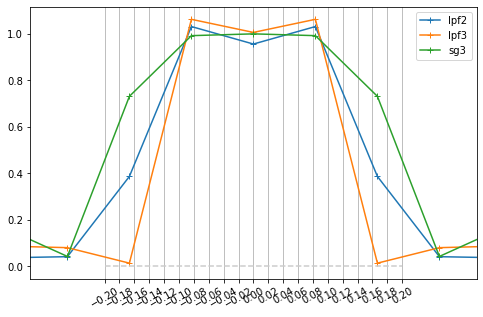

In [106]:
fff = lambda y: fftshift(abs(fft(y)))
plt.figure(figsize=(8,5))
x = np.linspace(-1,1,k)
plt.plot(x,fff(lpf2),'-+')
plt.plot(x,fff(lpf3),'-+')
plt.plot(x,fff(sg3),'-+')
plt.xlim(-0.3,0.3)
plt.grid(which='both', axis='x')
plt.xticks(np.linspace(-0.2,0.2,21),rotation=30);
plt.plot([-0.2, 0.2],[0.,0.],'--',color=(0.8,0.8,0.8))
plt.legend('lpf2,lpf3,sg3'.split(','))

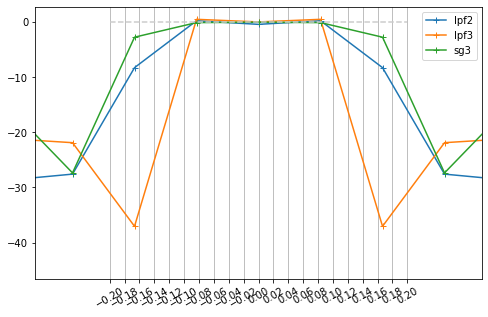

In [107]:
db = lambda y: 20*np.log10(y)

dbf = lambda y: db(fftshift(abs(fft(y))))
plt.figure(figsize=(8,5))
x = np.linspace(-1,1,k)
plt.plot(x,dbf(lpf2),'-+')
plt.plot(x,dbf(lpf3),'-+')
plt.plot(x,dbf(sg3),'-+')

plt.xlim(-0.3,0.3)
plt.grid(which='both', axis='x')
plt.xticks(np.linspace(-0.2,0.2,21),rotation=30);
plt.plot([-0.2, 0.2],[0.,0.],'--',color=(0.8,0.8,0.8))
plt.legend('lpf2,lpf3,sg3'.split(','))

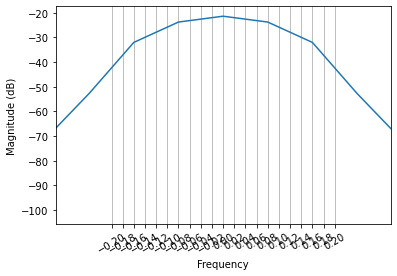

In [105]:
plt.magnitude_spectrum(lpf3,Fs=2,sides="twosided",scale='dB');
plt.xlim(-0.3,0.3)
plt.grid(which='both', axis='x')
plt.xticks(np.linspace(-0.2,0.2,21),rotation=30);
